<a href="https://colab.research.google.com/github/van-dang/DMRI-FEM-Cloud/blob/master/ArbitraryTimeSequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the code

In [0]:
# This program solves the Bloch-Torrey equation applied to computational diffusion MRI using 
# the finite element method coupled with the theta-method for the spatial discretization.

# The scope of usage: 
# (1) Single domains, Multilayered structures, manifolds
# (2) Membrane permeability for internal interfaces
#     Artificial permeability at the external interfaces
# (3) pure homogeneous Neumann BCs, (4) pseudo-periodic BCs

# Copyright (C) 2019 Van-Dang Nguyen (vdnguyen@kth.se)

# This file is part of DOLFIN.

# DOLFIN is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# DOLFIN is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
# GNU Lesser General Public License for more details.

# You should have received a copy of the GNU Lesser General Public License
# along with DOLFIN. If not, see <http://www.gnu.org/licenses/>.

# First added:  2017-10-10
# Last changed: 2019-04-25

# This demo is maintained by Van-Dang Nguyen
# Please report possible problems to vdnguyen@kth.se

# Setting a working environment with FEniCS

In [0]:
try:
    from google.colab import files
except:
    print("Running on a local runtime")
import platform, sys
python_version=platform.python_version()
from distutils.version import LooseVersion, StrictVersion

if ( LooseVersion(python_version) < LooseVersion("3.0.0")):
    print("Python3 is needed!");
    print("How to fix: Runtime/Change_runtime_type/Python 3");
    sys.exit()
    
try:
    from dolfin import *; from mshr import *
except ImportError as e:
    !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
    !add-apt-repository -y ppa:fenics-packages/fenics
    !apt-get update -qq
    !apt install -y --no-install-recommends fenics
    from dolfin import *; from mshr import *

gmsh_dir=!which gmsh
if len(gmsh_dir)==0:
  !apt-get install gmsh
    
import matplotlib.pyplot as plt;
from IPython.display import clear_output, display; import time; import dolfin.common.plotting as fenicsplot 
import time

import os, sys, shutil

clear_output()

dolfin_version = dolfin.__version__
print ('dolfin version:', dolfin_version)

# Disable warnings
import logging
logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger("rothemain.rothe_utils")
logging.getLogger('UFL').setLevel(logging.WARNING)
logging.getLogger('FFC').setLevel(logging.WARNING)

import warnings
warnings.filterwarnings("ignore")


dolfin version: 2019.1.0


#Load pre-defined functions

In [0]:
import sympy as sp  
exists = os.path.isfile('DmriFemLib.py')
isupdate = False
if (exists==False or isupdate==True):
    if isupdate==True:
        !rm DmriFemLib.py
    print("Load pre-defined functions from GitHub")
    !wget --quiet https://raw.githubusercontent.com/van-dang/DMRI-FEM-Cloud/master/DmriFemLib.py
from DmriFemLib import *

# Working on the mesh

Topological dimension:  2
Geometrical dimension:  2
Mesh size: #vertices: 853, #elements: 1584


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


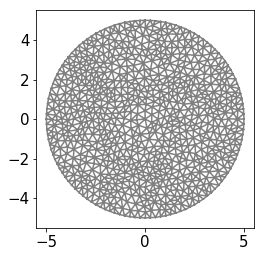

In [0]:
domain = Circle(Point(0.,0.), 5.0, 60)
mymesh = generate_mesh(domain, 20, "cgal")
#mymesh = RectangleMesh(Point(-10,-10), Point(10,10), 20, 20, diagonal='right')
gdim = mymesh.geometry().dim()
tdim = mymesh.topology().dim()

print('Topological dimension: ',tdim)
print('Geometrical dimension: ',gdim)
print('Mesh size: #vertices: '+str(mymesh.num_vertices()) +', #elements: '+str(mymesh.num_cells()) );
plot(mymesh)

# Solve the Bloch-Torrey equation

PGSE


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


Domain size: xmin=-5.000000, ymin=-5.000000, zmin=0.000000, xmax=5.000000, ymax=5.000000, zmax=0.000000
Function Space for Single Domains has 2 components
(ur, ui): r-real, i-imaginary
Initialize a standard function space.
t:   0.00  T: 20200.00 dt: 200.0 qvalue: 3.872983e-05 Completed 0.00%
t: 2000.00  T: 20200.00 dt: 200.0 qvalue: 3.872983e-05 Completed 9.80%
t: 4000.00  T: 20200.00 dt: 200.0 qvalue: 3.872983e-05 Completed 19.61%
t: 6000.00  T: 20200.00 dt: 200.0 qvalue: 3.872983e-05 Completed 29.41%
t: 8000.00  T: 20200.00 dt: 200.0 qvalue: 3.872983e-05 Completed 39.22%
t: 10000.00  T: 20200.00 dt: 200.0 qvalue: 3.872983e-05 Completed 49.02%
t: 12000.00  T: 20200.00 dt: 200.0 qvalue: 3.872983e-05 Completed 58.82%
t: 14000.00  T: 20200.00 dt: 200.0 qvalue: 3.872983e-05 Completed 68.63%
t: 16000.00  T: 20200.00 dt: 200.0 qvalue: 3.872983e-05 Completed 78.43%
t: 18000.00  T: 20200.00 dt: 200.0 qvalue: 3.872983e-05 Completed 88.24%


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


t: 20000.00  T: 20200.00 dt: 200.0 qvalue: 3.872983e-05 Completed 98.04%
Successfully Completed! Elapsed time: 2.386138 seconds
b: 1000.000, g: 0.145, q: 3.873e-05, Signal: 5.831e+01, Normalized signal: 7.438481e-01, dt: 200.000, hmin: 2.584e-01, hmax: 4.992e-01, whole_vol: 78.396, vol_of_interest: 78.396, elasped time 2.386 (s)

save to log.txt


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


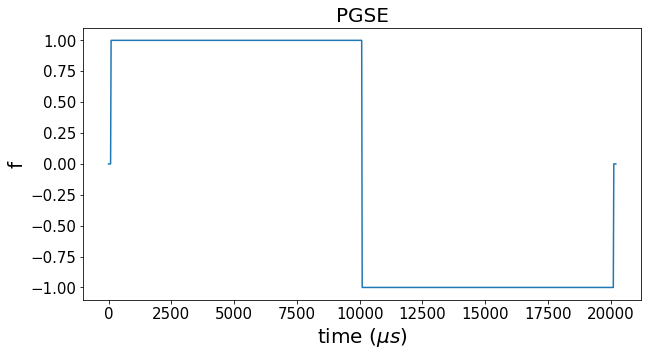

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


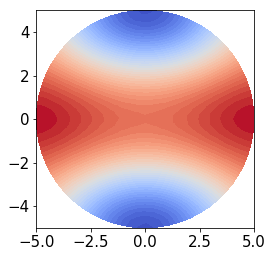

In [0]:
def plot_time_profile(mri_para):
    t_vals = [];
    f_vals = [];

    N = 1000;
    for i in range(N+1):
        t = i*(mri_para.T/N)
        t_vals.append(t)
        fval = mri_para.fs_sym.subs(mri_para.s, t)
        f_vals.append(fval);
    fig=plt.figure(figsize=(10, 5));
    plt.plot(t_vals, f_vals,'-')
    plt.title(mri_para.profile_name, fontsize=20)
    
    plt.xlabel(r'time ($\mu s$)', fontsize=20)
    plt.ylabel('f',fontsize=20)
    plt.rc('xtick', labelsize=15) 
    plt.rc('ytick', labelsize=15) 
    
    fig.savefig("time_profile.png", bbox_inches='tight')
    
mri_simu = MRI_simulation()
mri_para = MRI_parameters()

#################################################################################
#########################  Pre-defined parameters ###############################
# bvalues = [10000, 9000, 8000, 7000, 6000, 5000, 4000, 3000, 2000, 1000]
bvalues = [1000]
for bvalue in bvalues:
    mri_para.bvalue = bvalue;                              # bvalue (s/mm^2)
    mri_para.delta, mri_para.Delta = 10000, 10000        # time sequence (us)
    mri_para.set_gradient_dir(mymesh, 0, 1, 0)           # gradient direction

    # Some temporal profiles following these references
    # Double or Triple Diffusion Encoding:
    # # Multidimensional diffusion MRI, https://doi.org/10.1016/j.jmr.2016.12.007
    # # Conventions and nomenclature for double diffusion encoding NMR and MRI, https://doi.org/10.1002/mrm.25901
    # OGSE https://doi.org/10.1002/mrm.10385

    profile = 1
    t0 = 100;
    Dd = mri_para.Delta+mri_para.delta
    seq_ext = 100

    if profile==1:
        mri_para.profile_name = "PGSE"
        mri_para.T = Dd + t0 + seq_ext 
        mri_para.fs_sym = sp.Piecewise(
            (  0., mri_para.s < t0 ),
            (  1., mri_para.s < mri_para.delta + t0),
            (  0., mri_para.s < mri_para.Delta + t0),
            ( -1., mri_para.s < Dd + t0 ),
            (  0.,              True )  
        ) 

    if profile==2:
        mri_para.profile_name = "Double PGSE"
        d2seq = mri_para.delta
        disp = Dd + d2seq
        mri_para.T = 2*Dd + t0 + d2seq + seq_ext
        mri_para.fs_sym = sp.Piecewise(
            # period 1
            (  0., mri_para.s < t0 ),
            (  1., mri_para.s < mri_para.delta + t0),
            (  0., mri_para.s < mri_para.Delta + t0),
            ( -1., mri_para.s < Dd + t0 ),

            (  0., mri_para.s < disp),
            # period 2
            (  0., mri_para.s < t0 + disp),
            (  1., mri_para.s < mri_para.delta + t0 + disp),
            (  0., mri_para.s < mri_para.Delta + t0 + disp),
            ( -1., mri_para.s < Dd + t0 + disp),
            (  0.,              True )          
        ) 

    if profile==3:
        mri_para.profile_name = "cos-OGSE"
        mri_para.T = Dd + t0 + seq_ext
        mri_para.nperiod = 1
        omega = 2.0*mri_para.nperiod*pi/mri_para.delta
        tau = Dd/2.
        mri_para.fs_sym = sp.Piecewise(
            (  0.,                                   mri_para.s < t0 ),        
            (  sp.cos(omega*(mri_para.s-t0)) ,       mri_para.s <= mri_para.delta + t0),
            (  0.,                                   mri_para.s <= tau + t0),
            (  -sp.cos(omega*(mri_para.s-t0-tau)),   mri_para.s <= mri_para.delta + tau + t0),
            (  0.,                                   True )  
        )
    if profile==4:
        mri_para.profile_name = "sin-OGSE"
        mri_para.T = Dd + t0 + seq_ext
        mri_para.nperiod = 1
        omega = 2.0*mri_para.nperiod*pi/mri_para.delta
        tau = Dd/2.
        mri_para.fs_sym = sp.Piecewise(
            (  0.,                                   mri_para.s < t0 ),                
            (  sp.sin(omega*(mri_para.s-t0)) ,       mri_para.s <= mri_para.delta + t0),
            (  0.,                                   mri_para.s <= tau + t0),
            (  -sp.sin(omega*(mri_para.s-t0-tau)),   mri_para.s <= mri_para.delta + tau + t0),
            (  0.,                                   True )  
        )
    if profile==5: 
        mri_para.profile_name = "Trapezoid PGSE"
        mri_para.T = Dd + t0 + seq_ext 
        tau = mri_para.delta/3. # rise time
        mri_para.fs_sym = sp.Piecewise(
            (  0.,                                  mri_para.s < t0 ),                        
            (  (mri_para.s-t0)/tau,                 mri_para.s < tau + t0),
            (  1.,                                  mri_para.s < mri_para.delta -tau + t0),
            (  -(mri_para.s-t0-mri_para.delta)/tau, mri_para.s < mri_para.delta + t0),
            (  0.,                                  mri_para.s < mri_para.Delta + t0),
            (  -(mri_para.s-t0-mri_para.Delta)/tau, mri_para.s < mri_para.Delta + tau + t0),
            ( -1.,                                  mri_para.s < Dd - tau + t0),
            (  (mri_para.s-t0-Dd)/tau,              mri_para.s < Dd  + t0),
            (  0.,                                  True )  
        )   

    if profile==6: 
        mri_para.profile_name = "Double Trapezoid PGSE"
        tau = mri_para.delta/3. # rise time
        d2seq = mri_para.delta
        mri_para.T = 2*Dd + t0 + d2seq + seq_ext
        disp = Dd + d2seq
        mri_para.fs_sym = sp.Piecewise(
            # period 1
            (  0.,                                       mri_para.s < t0 ),                                
            (  (mri_para.s-t0)/tau,                      mri_para.s < tau + t0 ),
            (  1.,                                       mri_para.s < mri_para.delta -tau + t0 ),
            (  -(mri_para.s-t0-mri_para.delta)/tau,      mri_para.s < mri_para.delta + t0 ),
            (  0.,                                       mri_para.s < mri_para.Delta + t0 ),
            (  -(mri_para.s-t0-mri_para.Delta)/tau,      mri_para.s < mri_para.Delta + tau + t0),
            ( -1.,                                       mri_para.s < Dd - tau + t0),
            (  (mri_para.s-t0-Dd)/tau,                   mri_para.s < Dd + t0),

            (  0.,                                       mri_para.s < disp + t0 ),        
            # period 2
            (  (mri_para.s-t0-disp)/tau,                 mri_para.s < tau + t0 + disp ),
            (  1.,                                       mri_para.s < mri_para.delta -tau + t0 + disp),
            (  -(mri_para.s-t0-disp-mri_para.delta)/tau, mri_para.s < mri_para.delta + t0 + disp),
            (  0.,                                       mri_para.s < mri_para.Delta + t0 + disp),
            (  -(mri_para.s-t0-disp-mri_para.Delta)/tau, mri_para.s < mri_para.Delta + tau + t0 + disp),
            ( -1.,                                       mri_para.s < Dd - tau + t0 + disp),
            (  (mri_para.s-t0-disp-Dd)/tau,              mri_para.s < Dd + t0 + disp),
            (  0.,                                       True )  
        )   

    print(mri_para.profile_name)    
    plot_time_profile(mri_para)

    mri_para.Apply()
    
    mri_simu.k = 200;                             # time-step size (us)
    mri_simu.nskip = 10;                          # frequency to print ouputs
    mydomain = MyDomain(mymesh, mri_para)
    mydomain.phase = None
    mydomain.PeriodicDir = [0, 0, 0];             # Direction of the periodicity
    mydomain.IsDomainPeriodic = False             # Confirm if the mesh if periodic
    mydomain.IsDomainMultiple = False             # Confirm if the mesh is multiple
    mydomain.kappa = 1e-5                         # Permeability (m/s)
    ################################################################################
    mydomain.Apply()   # Call Apply before setting the diffusion tensor
    ################################################################################
    # Impose the diffusion coefficient (mm^2/s)
    mydomain.D = 3e-3;
    #################################################################################

    linsolver = PETScLUSolver("mumps")
    mri_simu.solve(mydomain, mri_para, linsolver)
    
    ctext = ''
    if bvalue == 10000:
        ctext = 'Disk R=5um, Delta=delta=10ms, D=3e-3 mm^2/s, Double Trapezoid PGSE'
    PostProcessing(mydomain, mri_para, mri_simu, plt, ctext)
    # Post_processing(mydomain, mri_simu,'Extracellular Simulation')
    
# files.download('log.txt') 
    